In [1]:
from face_detector_image_generator import face_detection_and_capture
from nan_finder import find_nan_columns
from keypoints_display_df import show_multiple_images_with_keypoints_in_dataframe
from keypoints_display_tf import show_multiple_images_with_keypoints_in_tf_datasets
from keypoints_flip_tf import flip_coordinate_and_image_horizontal_in_tf_dataset, flip_coordinate_and_image_vertical_in_tf_dataset
from keypoints_flip_df import flip_coordinate_and_image_horizontal_in_df, flip_coordinate_and_image_vertical_in_df
from sobel_module import tf_compute_sobel
from canny_module import tf_compute_canny

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Deteksi Titik Kunci pada Wajah Menggunakan Jaringan Saraf Tiruan**
---

Setelah kita belajar mendeteksi wajah menggunakan metode Viola-Jones, langkah berikutnya adalah mendeteksi titik-titik kunci pada wajah menggunakan jaringan saraf tiruan (neural network). Titik-titik kunci ini bisa mencakup posisi mata, hidung, mulut, dan sebagainya.

#### Apa Itu Deteksi Titik Kunci Wajah?

**Deteksi titik kunci wajah** adalah proses menemukan titik-titik spesifik pada wajah, seperti ujung mata, sudut bibir, atau ujung hidung. Ini lebih rumit dibandingkan deteksi objek biasa karena kita harus menemukan banyak titik pada berbagai posisi dan orientasi di wajah, bukan hanya empat sudut dari kotak pembatas.

#### Langkah-langkah dalam Deteksi Titik Kunci

1. **Deteksi Wajah**: Pertama-tama, kita harus mendeteksi wajah dalam gambar, biasanya dengan menempatkannya dalam sebuah kotak pembatas (bounding box).
  
2. **Deteksi Titik Kunci**: Setelah wajah ditemukan, kita menggunakan jaringan saraf tiruan untuk mendeteksi titik-titik kunci pada wajah tersebut. Ini berarti kita harus menemukan lebih dari 10 titik berbeda yang merepresentasikan bagian-bagian penting dari wajah.

#### Menggunakan Data untuk Pelatihan

Untuk melatih jaringan saraf tiruan agar bisa mendeteksi titik kunci dengan baik, kita memerlukan banyak data. Salah satu sumber data yang bagus adalah dari Kaggle, di mana terdapat banyak gambar wajah beserta titik-titik kuncinya. Misalnya, tantangan deteksi titik kunci wajah di Kaggle menyediakan file CSV yang berisi link ke 7.049 gambar (berukuran 96 x 96 piksel), masing-masing dengan 15 titik kunci.

#### Proses Pelatihan

Untuk melatih model deteksi titik kunci:
1. **Kumpulkan Data**: Kumpulkan gambar wajah dan tandai titik-titik kuncinya.
2. **Persiapkan Data**: Format data tersebut agar bisa digunakan oleh jaringan saraf tiruan.
3. **Latih Model**: Gunakan data tersebut untuk melatih model jaringan saraf tiruan agar dapat mendeteksi titik-titik kunci pada wajah baru.

#### Mengapa Ini Penting?

Deteksi titik kunci pada wajah sangat berguna dalam berbagai aplikasi, seperti:
- **Pengenalan Wajah**: Membantu komputer mengenali siapa orang dalam gambar.
- **Animasi Wajah**: Digunakan dalam pembuatan karakter animasi yang realistis.
- **Analisis Ekspresi Wajah**: Membantu memahami emosi seseorang dari ekspresi wajahnya.

#### Kesimpulan

Deteksi titik kunci pada wajah adalah langkah lanjutan setelah deteksi wajah yang memungkinkan kita untuk menganalisis wajah dengan lebih detail. Dengan menggunakan jaringan saraf tiruan, kita bisa mendeteksi titik-titik kunci ini secara akurat, meskipun ini adalah tugas yang lebih rumit dibandingkan deteksi objek biasa.

Semoga penjelasan ini membantu! Jika ada yang masih membingungkan atau ada yang ingin ditanyakan lebih lanjut, jangan ragu untuk bertanya.

### **Mempersiapkan Dataset untuk Deteksi Titik Kunci Wajah**
---

Untuk melatih komputer agar bisa mendeteksi titik kunci pada wajah, kita perlu mengumpulkan dan mempersiapkan dataset yang berisi banyak gambar wajah. Berikut adalah langkah-langkah untuk membuat dataset ini menggunakan webcam di komputer kamu.

### Langkah-langkah Membuat Dataset

1. **Memuat Haar Cascade Classifier**
   - Pertama, kita perlu memuat classifier Haar cascade yang akan kita gunakan untuk mendeteksi wajah. Classifier ini adalah file XML yang bisa kamu temukan di folder OpenCV kamu.
   - Contoh kode:
     ```python
     face_cascade = cv2.CascadeClassifier('path_to_haarcascade_frontalface_default.xml')
     ```

2. **Mengatur Kamera**
   - Kita menggunakan webcam untuk mengambil gambar wajah. Perintah `cv2.VideoCapture(0)` digunakan untuk mengakses kamera internal komputer. Jika kamu menggunakan kamera eksternal, gunakan `cv2.VideoCapture(1)`.
   - Contoh kode:
     ```python
     cam = cv2.VideoCapture(0)
     ```

3. **Mendeteksi Wajah dan Menampilkan di Layar**
   - Setiap frame yang dibaca dari kamera diproses untuk mendeteksi wajah menggunakan classifier yang kita muat di langkah 1. Jika wajah terdeteksi, kotak pembatas akan digambar di sekitar wajah dan hanya bagian wajah yang akan ditampilkan di layar.
   - Contoh kode:
     ```python
     while(True):
         ret, frame = cam.read()
         faces = face_cascade.detectMultiScale(frame, 1.3, 5)
         for (x, y, w, h) in faces:
             if w > 130:
                 detected_face = frame[int(y):int(y+h), int(x):int(x+w)]
                 cv2.imshow("test", detected_face)
         if not ret:
             break
         k = cv2.waitKey(1)
     ```

4. **Menyimpan Gambar**
   - Gambar wajah yang terdeteksi kemudian diubah ukurannya menjadi 299x299 piksel dan disimpan dalam folder yang sudah kamu buat (misalnya, folder `dataset`). Setiap kali kamu menekan tombol spasi, gambar akan disimpan dengan nomor file yang terus bertambah.
   - Contoh kode:
     ```python
     faceresize = cv2.resize(detected_face, (299, 299))
     img_name = "dataset/opencv_frame_{}.jpg".format(img_counter)
     cv2.imwrite(img_name, faceresize)
     ```

5. **Mengumpulkan dan Mengannotasi Gambar**
   - Ambil sekitar 100 gambar wajah dengan berbagai posisi dan orientasi. Lebih banyak gambar akan memberikan hasil deteksi yang lebih baik. Untuk anotasi (penandaan) titik kunci pada wajah, kamu bisa menggunakan alat anotasi seperti VGG annotator.
   - VGG annotator memungkinkan kamu untuk menandai titik-titik kunci seperti mata, hidung, dan bibir pada gambar. Misalnya, kamu bisa menandai 16 titik pada wajah yang mencakup mata kiri, mata kanan, hidung, bibir, dan bentuk wajah luar.

### Kesimpulan

Dengan mengikuti langkah-langkah ini, kamu bisa membuat dataset sendiri yang berisi gambar-gambar wajah dengan titik-titik kunci yang telah dianotasi. Dataset ini sangat penting untuk melatih model jaringan saraf tiruan agar bisa mendeteksi titik-titik kunci pada wajah dengan akurat. Proses ini memerlukan kerja keras dan ketelitian, tetapi hasilnya akan sangat bermanfaat untuk berbagai aplikasi seperti pengenalan wajah dan analisis ekspresi wajah.

### **Memproses Data Titik Kunci**
---

Ketika kita ingin mendeteksi titik-titik penting di wajah (seperti mata, hidung, dan mulut), kita membutuhkan data yang sudah di-annotate. Ada alat yang disebut VGG annotator yang bisa membantu kita dengan ini. Alat ini akan menghasilkan file CSV yang berisi koordinat (x, y) untuk setiap titik kunci pada setiap gambar.

#### Mengapa Ini Penting?

1. **Efisiensi**: Python kita tidak akan mencari banyak file gambar secara langsung, tetapi akan mencari data dari file CSV.
2. **Pengolahan Data**: Untuk setiap file CSV, ada 16 titik kunci yang harus diproses.
3. **Alternatif**: Ini adalah alternatif untuk menggunakan metode `ImageDataGenerator` dari Keras yang biasa digunakan untuk mengelola banyak file dalam direktori.

#### Langkah-Langkahnya

Untuk memudahkan pemahaman, kita akan membagi proses ini menjadi dua bagian:

1. **Praproses sebelum input ke dalam kode Keras-Python**
2. **Praproses dalam kode Keras-Python**

#### Praproses Sebelum Input ke Keras-Python

Sebelum kita memasukkan data ke dalam model Keras, kita perlu membersihkan dan menyiapkan data dari file CSV yang dihasilkan oleh VGG annotator. Proses ini melibatkan membaca file CSV, mengekstrak koordinat titik kunci, dan memastikan bahwa data siap untuk digunakan oleh model.

#### Praproses Dalam Kode Keras-Python

Setelah data siap, kita akan menggunakan Keras (sebuah pustaka untuk membuat dan melatih model pembelajaran mendalam) untuk memproses data lebih lanjut. Di sini, kita akan memastikan bahwa data diolah dengan benar saat dilatih oleh model.

#### Kesimpulan

Memproses data titik kunci memerlukan dua langkah utama: praproses sebelum memasukkan data ke dalam model Keras, dan praproses dalam model Keras itu sendiri. Dengan cara ini, kita memastikan bahwa data yang kita gunakan bersih, terstruktur, dan siap digunakan untuk melatih model pembelajaran mendalam yang akurat dan efisien.

In [2]:
train_path = './Assets/datasets/training.csv'
test_path = './Assets/datasets/test.csv'

# train_path = './Assets/trainimgface.csv'
# test_path = './Assets/testimgface.csv'
train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)

In [3]:
train_data[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [4]:
test_data[:1]

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...


In [5]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [6]:
test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 57.2 MB


In [7]:
get_nan_in_train_data = find_nan_columns(train_data, name_columns='facial_key_points', max_display=2)

left_eye_center_x:	Jumlah NaN: 10
left_eye_center_y:	Jumlah NaN: 10
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mouth_right_corner_x:	Jumlah NaN: 4779
mouth_right_corner_y:	Jumlah NaN:

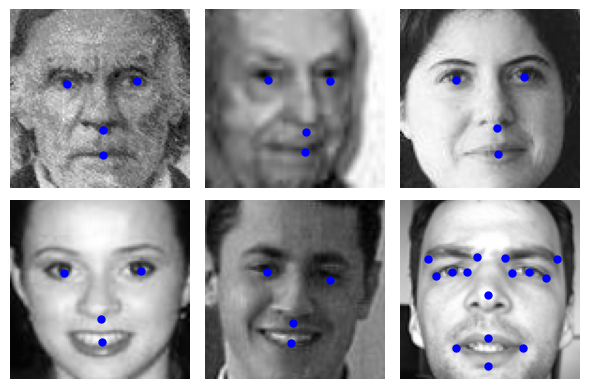

In [8]:
keypoints_columns = train_data.columns[:-1]
show_multiple_images_with_keypoints_in_dataframe(
    train_data, 
    image_column='Image',
    # parent_path='./Assets/Images/',
    keypoints_columns=keypoints_columns, 
    num_images=6, 
    image_size=(96, 96),
    figsize_per_image=(2, 2),
    scatter_size=100,
    n_seed=None
)

In [9]:
train_data_copy = train_data.copy(deep=True)

In [10]:
# train_data_copy.dropna(inplace=True)

In [11]:
get_nan_in_train_data_copy = find_nan_columns(train_data_copy, name_columns='facial_key_points', max_display=3)

left_eye_center_x:	Jumlah NaN: 10
left_eye_center_y:	Jumlah NaN: 10
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mouth_right_corner_x:	Jumlah NaN: 4779
mouth_right_corner_y:	Jumlah NaN:

In [12]:
print(f'''
data: {train_data_copy['Image'][0][:10]}
len: {len(train_data_copy['Image'][0][:10])}
type: {type(train_data_copy['Image'][0][:10])}
''')



data: 238 236 23
len: 10
type: <class 'str'>



In [13]:
length_data = len(train_data_copy['Image'][[0]].str.split(' ')[0])
target_reshape = int(np.sqrt(length_data))

print(f'''
length data: {length_data}
target_reshape: {target_reshape}
''')


length data: 9216
target_reshape: 96



In [14]:
train_data_images=train_data_copy['Image'].values
train_data_facial_keypoints=train_data_copy.drop(columns=['Image']).values

In [15]:
facial_keypoints_train_datasets = tf.data.Dataset.from_tensor_slices((train_data_images, train_data_facial_keypoints))

print(f'info data: {facial_keypoints_train_datasets}')
print(f'number of data: {len(facial_keypoints_train_datasets)}')

info data: <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
number of data: 7049


==========================Check data=========================
    img value: b'238 236 237 238 240 '
    dtype img: <class 'bytes'>
    keypoint value: [66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]
    dtype keypoint: float64
=======================Convert to List=======================
    vector of img: [b'238' b'236' b'237' ... b'70' b'75' b'90'] 
    shape img: (9216,)
    dtype img: <dtype: 'string'>
======================Convert to Numeric=====================
    vector of img: [238. 236. 237. ...  70.  75.  90.] 
    shape img: (9216,)
    dtype img: <dtype: 'float32'>
    target image ndim: 96.0
    max intensity: 253.0
    min intensity: 2.0
============Reshape to

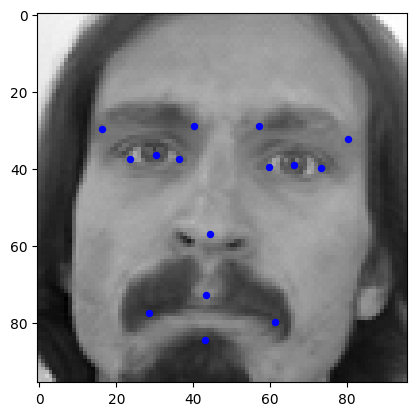

In [16]:
for img, keypoint in facial_keypoints_train_datasets.take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    img value: {img[:20]}
    dtype img: {type(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}'''
    )

    print(f"{'Convert to List'.center(61, '=')}")
    cvt_to_list = tf.strings.split(img, sep=' ')
    print(f'''    vector of img: {cvt_to_list} 
    shape img: {cvt_to_list.shape}
    dtype img: {cvt_to_list.dtype}'''
    )
    
    print(f"{'Convert to Numeric'.center(61, '=')}")
    cvt_to_num = image = tf.strings.to_number(cvt_to_list, out_type=tf.float32)
    print(f'''    vector of img: {cvt_to_num} 
    shape img: {cvt_to_num.shape}
    dtype img: {cvt_to_num.dtype}
    target image ndim: {tf.math.sqrt(cvt_to_num.shape[0] / 1.)}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    print(f"{'Reshape to height and width dimension'.center(61, '=')}")
    cvt_to_img = tf.reshape(cvt_to_num, (96, 96))
    print(f'''    matriks of img: {cvt_to_img} 
    shape img: {cvt_to_img.shape}
    dtype img: {cvt_to_img.dtype}
    max intensity: {tf.reduce_max(cvt_to_img)}
    min intensity: {tf.reduce_min(cvt_to_img)}'''
    )

    print(f"{'Normalized image'.center(61, '=')}")
    normalized_img = (cvt_to_img / 255) * 1.0
    print(f'''    matriks of img: {normalized_img} 
    shape img: {normalized_img.shape}
    dtype img: {normalized_img.dtype}
    max intensity: {tf.reduce_max(normalized_img)}
    min intensity: {tf.reduce_min(normalized_img)}'''
    )

    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(normalized_img, cmap='gray')
plt.show()

In [17]:
def preprocessing_train_data(image, keypoint=None, input_shape=None):
    image = tf.strings.split(image, sep=' ')
    image = tf.strings.to_number(image, out_type=tf.float32)
    image = (image / 255) * 1.0
    image = tf.reshape(image, input_shape)
    return image, keypoint

def replace_nan_with_zero(image, keypoint):
    keypoint = tf.where(tf.math.is_nan(keypoint), tf.zeros_like(keypoint), keypoint)
    return image, keypoint

def get_nan_in_data(image, keypoint):
    # Memeriksa apakah ada NaN dalam keypoint
    get_nan_in_data = tf.reduce_any(tf.math.is_nan(keypoint))
    return get_nan_in_data

In [18]:
get_nan_infacial_keypoints_train_datasets = facial_keypoints_train_datasets.filter(get_nan_in_data)

print(get_nan_infacial_keypoints_train_datasets)
for image, keypoint in get_nan_infacial_keypoints_train_datasets.take(1):
    print("Image shape:", image.shape)
    print("Keypoints:", keypoint.numpy())

<_FilterDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
Image shape: ()
Keypoints: [65.36512  39.98848  28.25152  37.39968  59.32288  40.85184  71.98208
 41.7152   33.71776  38.5504   21.34656  37.97504  57.5968   30.494656
 80.03776  33.94688  37.45792  27.617664 15.59296  27.329984 45.2256
 61.27872  57.8848   87.4592   34.29312  85.15776  46.37696  79.11616
       nan       nan]


In [44]:
facial_keypoints_train_datasets_processed = facial_keypoints_train_datasets.map(
    map_func=lambda image, keypoint: 
        preprocessing_train_data(
            image=image, 
            keypoint=keypoint,
            input_shape=(96, 96, 1)
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

facial_keypoints_train_datasets_flip_h = facial_keypoints_train_datasets_processed.map(
    map_func=lambda image, keypoint: 
        flip_coordinate_and_image_horizontal_in_tf_dataset(
            image=image,
            keypoint=keypoint
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

facial_keypoints_concatenated_train_dataset = facial_keypoints_train_datasets_processed.concatenate(facial_keypoints_train_datasets_flip_h)

facial_keypoints_train_datasets_not_nan = facial_keypoints_concatenated_train_dataset.map(
    map_func=lambda image, keypoint: 
        replace_nan_with_zero(
            image=image, 
            keypoint=keypoint,
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

# facial_keypoints_train_dataset_sobel = facial_keypoints_train_datasets_not_nan.map(lambda image, keypoint: tf_compute_sobel(image, keypoint, ksize=9))
facial_keypoints_train_dataset_canny = facial_keypoints_train_datasets_not_nan.map(lambda image, keypoint: tf_compute_canny(image, keypoint, threshold1=30, threshold2=110))

facial_keypoints_concatenated_train_dataset_cached = facial_keypoints_train_dataset_canny.cache()

In [45]:
print(f'info data: {facial_keypoints_concatenated_train_dataset_cached}')
print(f'number of data: {len(facial_keypoints_concatenated_train_dataset_cached)}')

info data: <CacheDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
number of data: 14098


==========================Check data=========================
    shape img: (96, 96, 1)
    dtype img: float32
    max intensity: 1.0
    min intensity: 0.0
    keypoint value: [65.27058824 34.94023529 33.0227451  32.97694118 60.50321569 34.94023529
 70.03733333 36.34196078 36.94870588 34.09882353 27.69505882 34.37929412
 58.26007843 29.89239216 75.36501961 29.33145098 40.34572549 29.16831373
 22.64784314 27.6492549  47.88454902 52.88658824 57.13819608 68.58917647
 34.98541176 67.18745098 46.48282353 63.54196078 46.20235294 74.19796078]
    dtype keypoint: float64
    shape keypoint: (30,)


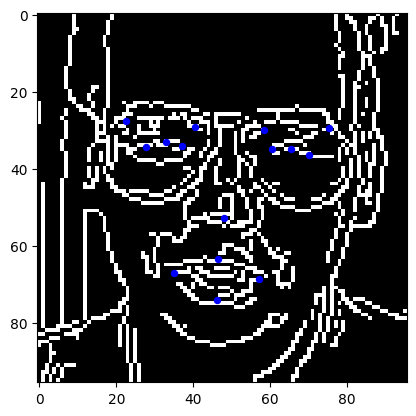

In [47]:
for img, keypoint in facial_keypoints_concatenated_train_dataset_cached.skip(13).take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    shape img: {img.shape}
    dtype img: {img.dtype}
    max intensity: {tf.reduce_max(img)}
    min intensity: {tf.reduce_min(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}
    shape keypoint: {keypoint.shape}'''
    )

    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(img, cmap='gray')
plt.show()

In [48]:
get_nan_infacial_keypoints_train_datasets = facial_keypoints_concatenated_train_dataset_cached.filter(get_nan_in_data)

print(get_nan_infacial_keypoints_train_datasets)
for image, keypoint in get_nan_infacial_keypoints_train_datasets.take(1):
    print("Image shape:", image.shape)
    print("Keypoints:", keypoint.numpy())

<_FilterDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>


Original Datasets


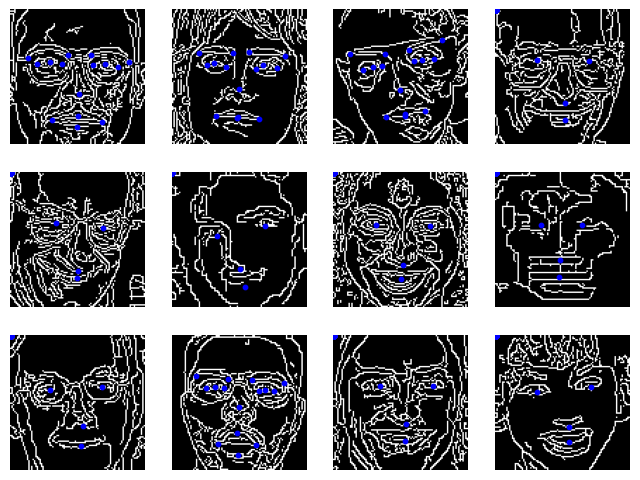

In [49]:
print('Original Datasets')
tf.random.set_seed(12)
show_multiple_images_with_keypoints_in_tf_datasets(
    dataset=facial_keypoints_concatenated_train_dataset_cached.take(int(len(facial_keypoints_concatenated_train_dataset_cached)/2)), 
    num_images=12, 
    figsize_per_image=(2, 2), 
    scatter_size=10, 
    scatter_color='blue'
)

Fliped Datasets


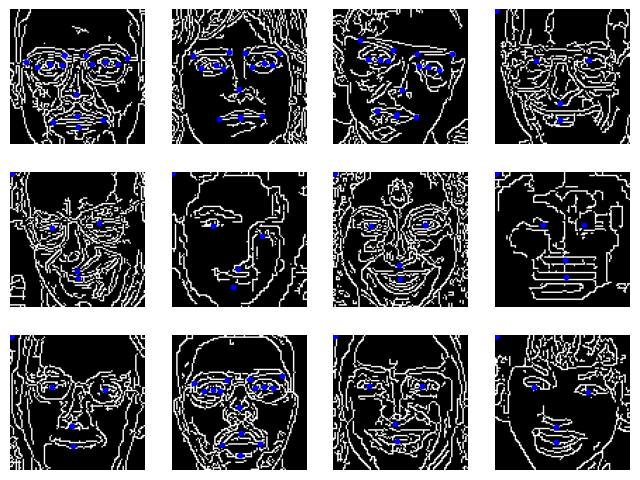

In [50]:
print('Fliped Datasets')
tf.random.set_seed(12)
show_multiple_images_with_keypoints_in_tf_datasets(
    dataset=facial_keypoints_concatenated_train_dataset_cached.skip(int(len(facial_keypoints_concatenated_train_dataset_cached)/2)), 
    num_images=12, 
    figsize_per_image=(2, 2), 
    scatter_size=10, 
    scatter_color='blue'
)

In [51]:
facial_keypoints_concatenated_train_dataset_cached.save("./Assets/datasets/canny_facial_keypoints_train_dataset.tfrecord", compression="GZIP")

In [52]:
test_data_copy = test_data.copy(deep=True)

In [53]:
facial_keypoints_test_datasets = tf.data.Dataset.from_tensor_slices(test_data_copy['Image'].values)

print(f'info data: {facial_keypoints_test_datasets}')
print(f'number of data: {len(facial_keypoints_test_datasets)}')

info data: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
number of data: 1783


==========================Check data=========================
    img value: b'182 183 182 182 180 '
    dtype img: <class 'bytes'>
=======================Convert to List=======================
    vector of img: [b'182' b'183' b'182' ... b'8' b'5' b'5'] 
    shape img: (9216,)
    dtype img: <dtype: 'string'>
======================Convert to Numeric=====================
    vector of img: [182. 183. 182. ...   8.   5.   5.] 
    shape img: (9216,)
    dtype img: <dtype: 'float32'>
    target image ndim: 96.0
    max intensity: 191.0
    min intensity: 0.0
============Reshape to height and width dimension============
    matriks of img: [[182. 183. 182. ... 182. 182. 182.]
 [182. 181. 181. ... 182. 182. 182.]
 [182. 181. 180. ... 182. 181. 182.]
 ...
 [ 42.  36.  20. ... 126. 136. 153.]
 [ 31.   8.   0. ...   9.  11.  33.]
 [  3.   0.   1. ...   8.   5.   5.]] 
    shape img: (96, 96)
    dtype img: <dtype: 'float32'>
    max intensity: 191.0
    min intensity: 0.0
====================

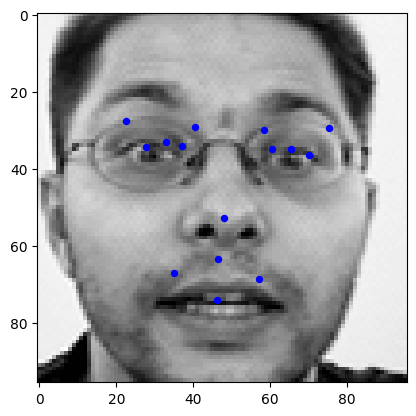

In [54]:
for img in facial_keypoints_test_datasets.take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    img value: {img[:20]}
    dtype img: {type(img)}'''
    )

    print(f"{'Convert to List'.center(61, '=')}")
    cvt_to_list = tf.strings.split(img, sep=' ')
    print(f'''    vector of img: {cvt_to_list} 
    shape img: {cvt_to_list.shape}
    dtype img: {cvt_to_list.dtype}'''
    )
    
    print(f"{'Convert to Numeric'.center(61, '=')}")
    cvt_to_num = image = tf.strings.to_number(cvt_to_list, out_type=tf.float32)
    print(f'''    vector of img: {cvt_to_num} 
    shape img: {cvt_to_num.shape}
    dtype img: {cvt_to_num.dtype}
    target image ndim: {tf.math.sqrt(cvt_to_num.shape[0] / 1.)}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    print(f"{'Reshape to height and width dimension'.center(61, '=')}")
    cvt_to_img = tf.reshape(cvt_to_num, (96, 96))
    print(f'''    matriks of img: {cvt_to_img} 
    shape img: {cvt_to_img.shape}
    dtype img: {cvt_to_img.dtype}
    max intensity: {tf.reduce_max(cvt_to_img)}
    min intensity: {tf.reduce_min(cvt_to_img)}'''
    )

    print(f"{'Normalized image'.center(61, '=')}")
    normalized_img = (cvt_to_img / 255) * 1.0
    print(f'''    matriks of img: {normalized_img} 
    shape img: {normalized_img.shape}
    dtype img: {normalized_img.dtype}
    max intensity: {tf.reduce_max(normalized_img)}
    min intensity: {tf.reduce_min(normalized_img)}'''
    )

    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(normalized_img, cmap='gray')
plt.show()

In [55]:
def preprocessing_test_data(image, input_shape=None):
    # Split the image string into a list of numbers
    image = tf.strings.split(image, sep=' ')
    # Convert the split strings into numbers
    image = tf.strings.to_number(image, out_type=tf.float32)
    image = (image / 255) * 1.0
    # Reshape the image to its original shape (e.g., 96x96 if the image is 96x96 pixels)
    image = tf.reshape(image, input_shape)
    return image

In [56]:
facial_keypoints_test_datasets_processed = facial_keypoints_test_datasets.map(
    map_func=lambda image: 
        preprocessing_test_data(
            image=image, 
            input_shape=(96, 96, 1)
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

facial_keypoints_test_dataset_cached = facial_keypoints_test_datasets_processed.cache()

In [57]:
print(f'info data: {facial_keypoints_test_dataset_cached}')
print(f'number of data: {len(facial_keypoints_test_dataset_cached)}')

info data: <CacheDataset element_spec=TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None)>
number of data: 1783


==========================Check data=========================
    shape img: (96, 96, 1)
    dtype img: float32
    max intensity: 0.9686274528503418
    min intensity: 0.007843137718737125
    keypoint value: [65.27058824 34.94023529 33.0227451  32.97694118 60.50321569 34.94023529
 70.03733333 36.34196078 36.94870588 34.09882353 27.69505882 34.37929412
 58.26007843 29.89239216 75.36501961 29.33145098 40.34572549 29.16831373
 22.64784314 27.6492549  47.88454902 52.88658824 57.13819608 68.58917647
 34.98541176 67.18745098 46.48282353 63.54196078 46.20235294 74.19796078]
    dtype keypoint: float64


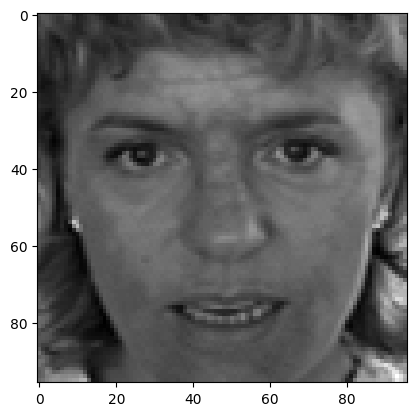

In [58]:
for img in facial_keypoints_test_dataset_cached.skip(1).take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    shape img: {img.shape}
    dtype img: {img.dtype}
    max intensity: {tf.reduce_max(img)}
    min intensity: {tf.reduce_min(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}'''
    )
    plt.imshow(img, cmap='gray')
plt.show()

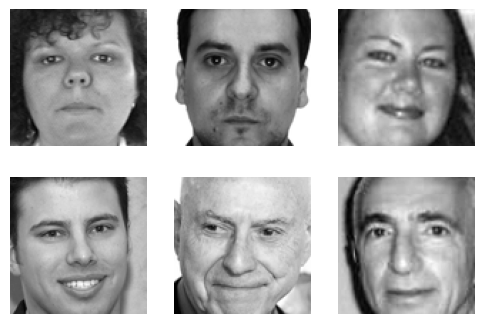

In [59]:
show_multiple_images_with_keypoints_in_tf_datasets(facial_keypoints_test_dataset_cached.map(lambda x: (x, None)), num_images=6)

In [60]:
facial_keypoints_test_dataset_cached.save("./Assets/datasets/facial_keypoints_test_dataset.tfrecord", compression="GZIP")